# SDE Integrator - Random Walk
I want to write a stochastic ODE integrator for the following differential equation,

$$ \frac{dX}{dt} = \sigma W_t $$

where $W_t$ is a Weiner process. Numerically, I want to reproduce $\langle X^2 \rangle = \sigma^2 t$ where the averaging is over different realizations of the noise.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from numba import jit,njit

## Euler-Maruyama Integrator

In [4]:
@njit
def euler_maruyama(t_vec,y_0,sigma):
    '''
    Integrate using the Euler-Maruyama first order method with the noise term
    Returns y of length len(t_vec). It is assumed that t_vec[0] = 0 for which y = y_0
    '''
    res = np.zeros(len(t_vec))
    dt = abs(t_vec[1] - t_vec[0])
    noise_terms = np.random.normal(loc=0,scale = np.sqrt(dt),size=t_vec.shape[0])
    res[0] = y_0
    for i in range(1,len(t_vec)):
        y_old = res[i-1]
        y_new = y_old + sigma*noise_terms[i]
        res[i] = y_new
    return res

In [26]:
t_vec = np.linspace(0,10000,1000)
sigma = 0.1
y_0 = 0
y_vec= euler_maruyama(t_vec,y_0,sigma)

27.4 µs ± 695 ns per loop (mean ± std. dev. of 7 runs, 10000 loops each)


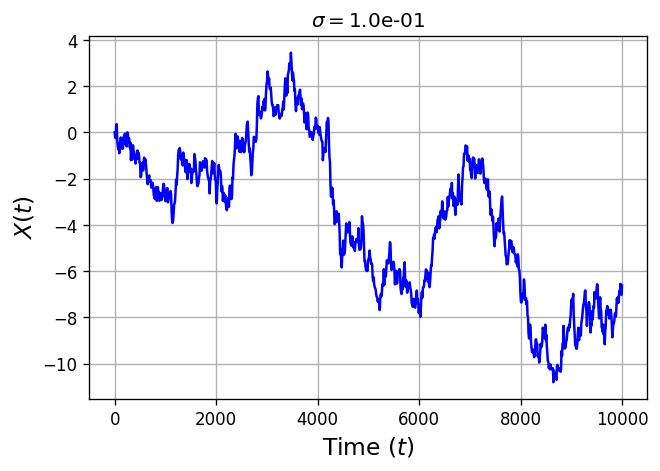

In [10]:
plt.figure(dpi=120)
plt.plot(t_vec,y_vec,'b')
plt.xlabel(r"Time $(t)$",fontsize=14)
plt.ylabel(r"$X(t)$",fontsize=14)
plt.title(r"$\sigma = $" + "{:.1e}".format(sigma))
plt.grid(True)

## Averaging over Sim. Runs

In [51]:
N_runs = 10000
sigma = 0.5
y_0 = 0

t_vec = np.linspace(0,100,1000)
X_arr = np.zeros((N_runs,len(t_vec)))

for ind in range(N_runs):
    y_vec= euler_maruyama(t_vec,y_0,sigma)
    X_arr[ind] = y_vec

In [52]:
X_avg = np.mean(X_arr,axis=0)
X_var = np.std(X_arr,axis=0)**2

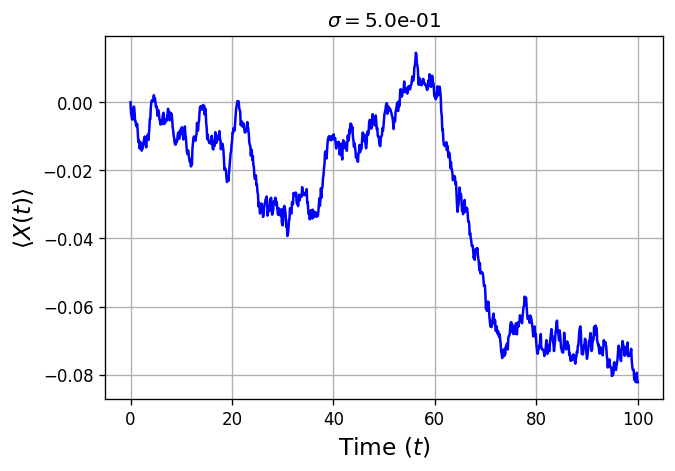

In [53]:
plt.figure(dpi=120)
plt.plot(t_vec,X_avg,'b')
plt.xlabel(r"Time $(t)$",fontsize=14)
plt.ylabel(r"$\langle X(t) \rangle$",fontsize=14)
plt.title(r"$\sigma = $" + "{:.1e}".format(sigma))
plt.grid(True)

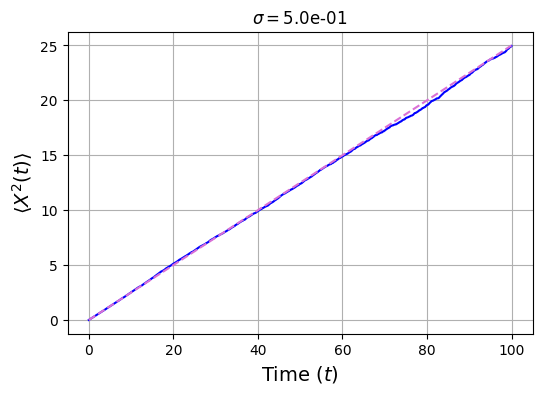

In [54]:
plt.figure(dpi=100)
plt.plot(t_vec,X_var,'b')
plt.plot(t_vec,sigma**2*t_vec,color='orchid',linestyle='--')
plt.xlabel(r"Time $(t)$",fontsize=14)
plt.ylabel(r"$\langle X^2(t) \rangle$",fontsize=14)
plt.title(r"$\sigma = $" + "{:.1e}".format(sigma))
plt.grid(True)